In [125]:
#importing libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# load data
df = pd.read_csv("data_cleaned_2021.csv")


# CLEANING / PROCESSING DATA#

In [126]:
#getting an idea of what the data set contains

df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
#looking at the data types of each field keeping a mental note of floats and ints 
df.info()

In [128]:
#Looking for nulls
df.isnull().sum()
#no nulls

In [ ]:
#looking for missing values
df.isna().sum()

In [137]:

#cardinality check
df.nunique()

index                 742
Job Title               8
Salary Estimate       416
Job Description       463
Rating                 31
Company Name          343
Location              200
Headquarters          198
Size                    8
Founded               102
Type of ownership       9
Industry               60
Sector                 25
Revenue                13
Competitors           128
Hourly                  2
Employer provided       2
Lower Salary          113
Upper Salary          162
Avg Salary(K)         219
company_txt           343
Job Location           37
Age                   102
Python                  2
spark                   2
aws                     2
excel                   2
sql                     2
sas                     2
keras                   2
pytorch                 2
scikit                  2
tensor                  2
hadoop                  2
tableau                 2
bi                      2
flink                   2
mongo                   2
google_an   

In [130]:


#cleaning job title
for i, row in df.iterrows():
    #print(df.at[i,"Job Title"])
    if "scientist" in str(df.at[i,"Job Title"]).lower():
           
            df.at[i,"Job Title"] = "Data Scientist" 
    elif "analyst" in df.at[i,"Job Title"].lower():
         
            df.at[i,"Job Title"] = "Data Analyst"
    elif "engineer" in df.at[i,"Job Title"].lower():
            
            df.at[i,"Job Title"] = "Data Engineer"
    elif "modeler" in df.at[i,"Job Title"].lower():
            
            df.at[i,"Job Title"] = "Data Engineer"        
    elif "manager" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Science Manager"   
    elif "director" in df.at[i,"Job Title"].lower():
   
            df.at[i,"Job Title"] = "Data Science Director"           
    elif "consult" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Science Consultant"      
    elif "architect" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Architect" 
    else:
        df.at[i,"Job Title"] = "Other" 


        

In [131]:
#cleaning degree column
for i, row in df.iterrows():
    #print(df.at[i,"Job Title"])
    if "m" in str(df.at[i,"Degree"]).lower(): 
        df.at[i,"Degree"] = "Masters"
    if "na" in str(df.at[i,"Degree"]).lower(): 
        df.at[i,"Degree"] = "Bachelors"
    if "p" in str(df.at[i,"Degree"]).lower(): 
        df.at[i,"Degree"] = "PHD"
    print(df.at[i,"Degree"])

Masters
Masters
Masters
Bachelors
Bachelors
Bachelors
Bachelors
Masters
PHD
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Masters
Bachelors
PHD
Masters
Bachelors
Masters
Masters
PHD
Masters
Masters
Bachelors
Bachelors
Bachelors
Bachelors
Masters
Masters
Bachelors
Masters
Bachelors
Masters
Bachelors
Bachelors
Masters
PHD
Masters
Masters
Bachelors
Bachelors
Masters
Masters
Masters
Bachelors
Bachelors
Masters
Masters
Bachelors
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Masters
PHD
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Masters
Masters
Masters
PHD
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Masters
PHD
Masters
Masters
Masters
PHD
Masters
Bachelors
Bachelors
Bachelors
Bachelors
Bachelors
Bachelors
Bachelors
Bachelors
Masters
Masters
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Bachelors
Bachelors
Bachelors
Bachelors
Masters
Bachelors
Masters
Masters
Masters
Bachelors
Bachelors
PHD
Bachelors
Bachelors
Masters
Bachelors
Masters
Mast

In [132]:
for i, row in df.iterrows():
    if 1 == df.at[i,"Python"]:
        df.at[i,"Python TF"]="True"
    else:
        df.at[i,"Python TF"]="False"
        
for i, row in df.iterrows():
    if 1 == df.at[i,"spark"]:
        df.at[i,"spark TF"]="True"
    else:
        df.at[i,"spark TF"]="False"     
        
for i, row in df.iterrows():
    if 1 == df.at[i,"aws"]:
        df.at[i,"aws TF"]="True"
    else:
        df.at[i,"aws TF"]="False"  
        
for i, row in df.iterrows():
    if 1 == df.at[i,"excel"]:
        df.at[i,"excel TF"]="True"
    else:
        df.at[i,"excel TF"]="False"
        
for i, row in df.iterrows():
    if 1 == df.at[i,"sql"]:
        df.at[i,"sql TF"]="True"
    else:
        df.at[i,"sql TF"]="False"  
        
for i, row in df.iterrows():
    if 1 == df.at[i,"sas"]:
        df.at[i,"sas TF"]="True"
    else:
        df.at[i,"sas TF"]="False" 
for i, row in df.iterrows():
    if 1 == df.at[i,"sql"]:
        df.at[i,"keras TF"]="True"
    else:
        df.at[i,"keras TF"]="False"  
for i, row in df.iterrows():
    if 1 == df.at[i,"pytorch"]:
        df.at[i,"pytorch TF"]="True"
    else:
        df.at[i,"pytorch TF"]="False"    
for i, row in df.iterrows():
    if 1 == df.at[i,"scikit"]:
        df.at[i,"scikit TF"]="True"
    else:
        df.at[i,"scikit TF"]="False" 
for i, row in df.iterrows():
    if 1 == df.at[i,"tensor"]:
        df.at[i,"tensor TF"]="True"
    else:
        df.at[i,"tensor TF"]="False"         
        
for i, row in df.iterrows():
    if 1 == df.at[i,"hadoop"]:
        df.at[i,"hadoop TF"]="True"
    else:
        df.at[i,"hadoop TF"]="False"         
        
for i, row in df.iterrows():
    if 1 == df.at[i,"tableau"]:
        df.at[i,"tableau TF"]="True"
    else:
        df.at[i,"tableau TF"]="False"             
        
for i, row in df.iterrows():
    if 1 == df.at[i,"bi"]:
        df.at[i,"bi TF"]="True"
    else:
        df.at[i,"bi TF"]="False" 

for i, row in df.iterrows():
    if 1 == df.at[i,"flink"]:
        df.at[i,"flink TF"]="True"
    else:
        df.at[i,"flink TF"]="False"  
        
for i, row in df.iterrows():
    if 1 == df.at[i,"mongo"]:
        df.at[i,"mongo TF"]="True"
    else:
        df.at[i,"mongo TF"]="False"    
        
for i, row in df.iterrows():
    if 1 == df.at[i,"google_an"]:
        df.at[i,"google_an TF"]="True"
    else:
        df.at[i,"google_an TF"]="False"          

In [133]:
#cleaning degree column
for i, row in df.iterrows():
    #print(df.at[i,"Job Title"])
    if "na" in str(df.at[i,"seniority_by_title"]).lower(): 
        df.at[i,"seniority_by_title"] = "Mid Level"
    if "sr" in str(df.at[i,"seniority_by_title"]).lower(): 
        df.at[i,"seniority_by_title"] = "Senior Level"
    if "jr" in str(df.at[i,"seniority_by_title"]).lower(): 
        df.at[i,"seniority_by_title"] = "Junior Level"
    print(df.at[i,"seniority_by_title"])

Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Junior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level
Senior Level
Mid Level
Mid Level
Mid Level
Mid Level
Mid Level


In [134]:
df.to_csv('midterm cleaned.csv')

# Analytics#

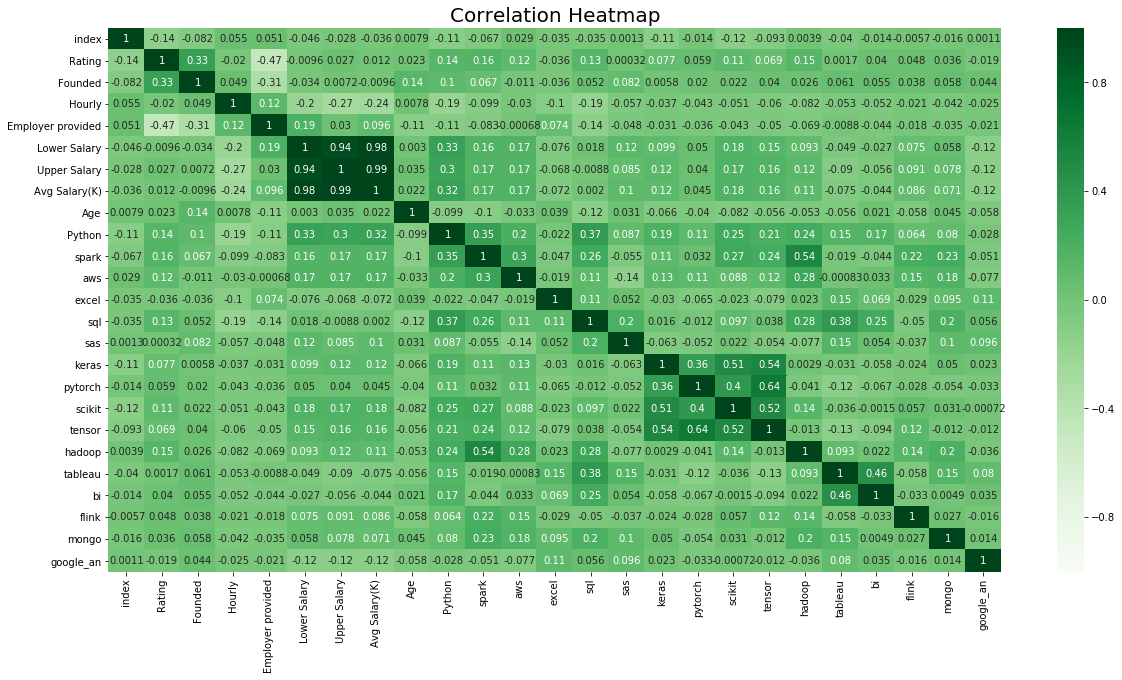

In [135]:
#correlation matrix
# Generate the correlation matrix and finding the strongest positive and negative correlations
corrMap = df.corr()
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corrMap, vmin=-1, vmax=1, annot=True, cmap="Greens")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20});
plt.show()

['Data Scientist' 'Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'Data Science Director' 'Other' 'Data Science Manager' 'Data Architect']


<BarContainer object of 742 artists>

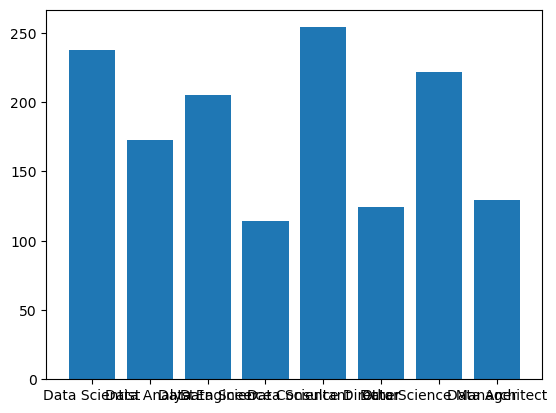

In [17]:

import numpy as np  
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("data_cleaned_2021.csv")

#cleaning job title
for i, row in df.iterrows():
    #print(df.at[i,"Job Title"])
    if "scientist" in str(df.at[i,"Job Title"]).lower():
           
            df.at[i,"Job Title"] = "Data Scientist" 
    elif "analyst" in df.at[i,"Job Title"].lower():
         
            df.at[i,"Job Title"] = "Data Analyst"
    elif "engineer" in df.at[i,"Job Title"].lower():
            
            df.at[i,"Job Title"] = "Data Engineer"
    elif "modeler" in df.at[i,"Job Title"].lower():
            
            df.at[i,"Job Title"] = "Data Engineer"        
    elif "manager" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Science Manager"   
    elif "director" in df.at[i,"Job Title"].lower():
   
            df.at[i,"Job Title"] = "Data Science Director"           
    elif "consult" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Science Consultant"      
    elif "architect" in df.at[i,"Job Title"].lower():
     
            df.at[i,"Job Title"] = "Data Architect" 
    else:
        df.at[i,"Job Title"] = "Other" 

        
        
#option="Degree"
option="Job Title"

x=df[option].unique()
print(x)  



#plt.bar(x=df['Degree'],height=df['Avg Salary(K)'])


plt.bar(x=df[option],height=df['Avg Salary(K)'])



